# 2.4: Fundamentals of Visualization Libraries Pt 2

In [2]:
from pathlib import Path
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Absolute paths
PROJECT_ROOT = Path(r"C:\Users\henry\OneDrive\citibike-dashboard-2022")
DATA_DIR = PROJECT_ROOT / "Data"
VIS_DIR = PROJECT_ROOT / "Visualizations"
os.makedirs(VIS_DIR, exist_ok=True)

weather_fp = PROJECT_ROOT / "Data" / "laguardia_2022_weather.csv"
trips_fp = PROJECT_ROOT / "Data" / "citibike_weather_2022.csv"

# Diagnostics
print("Project root:", PROJECT_ROOT)
print("Has Data folder?", DATA_DIR.is_dir())
print("Weather CSV exists?", weather_fp.exists())
print("Trips CSV exists?", trips_fp.exists())

# Load data
weather = pd.read_csv(weather_fp, parse_dates=["date"])
trips = pd.read_csv(trips_fp, parse_dates=["started_at", "ended_at", "date"])

print(f"Loaded weather: {weather.shape}")
print(f"Loaded trips:   {trips.shape}")


Project root: C:\Users\henry\OneDrive\citibike-dashboard-2022
Has Data folder? True
Weather CSV exists? True
Trips CSV exists? True
Loaded weather: (365, 7)
Loaded trips:   (786983, 20)


In [3]:
sns.set_theme(style="whitegrid", palette="pastel")


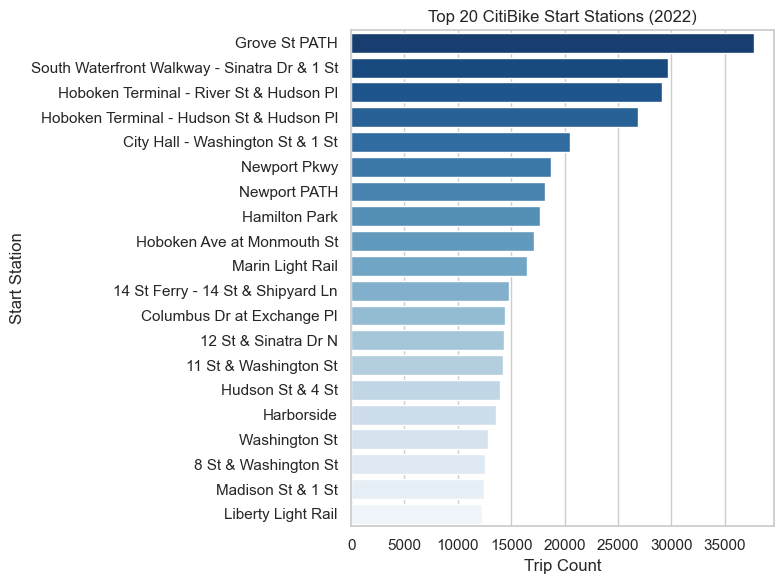

Saved bar chart to C:\Users\henry\OneDrive\citibike-dashboard-2022\Visualizations\top20_start_stations.png


In [4]:
station_col = "start_station_name" if "start_station_name" in trips.columns else "from_station_name"
top20 = (
    trips[station_col]
    .value_counts()
    .nlargest(20)
    .reset_index()
    .rename(columns={"index": station_col, station_col: "count"})
)
plt.figure(figsize=(8, 6))
sns.barplot(data=top20, y=station_col, x="count", palette="Blues_r")
plt.title("Top 20 CitiBike Start Stations (2022)")
plt.xlabel("Trip Count")
plt.ylabel("Start Station")
plt.tight_layout()
bar_path = VIS_DIR / "top20_start_stations.png"
plt.savefig(bar_path)
plt.show()


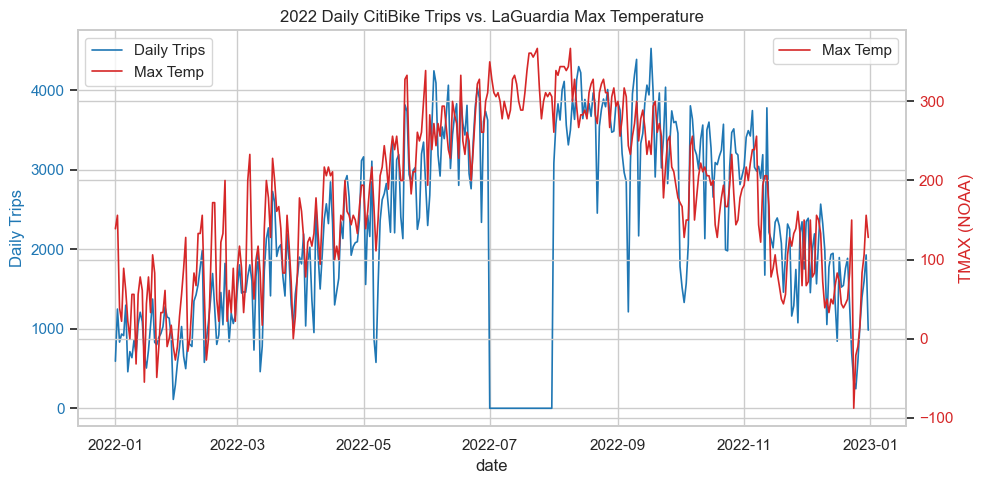

Saved dual-axis plot to C:\Users\henry\OneDrive\citibike-dashboard-2022\Visualizations\trips_vs_temp_seaborn.png


In [5]:
daily = (
    trips.groupby(trips["date"].dt.date)
    .size()
    .rename("trips_daily")
    .reset_index()
)
daily["date"] = pd.to_datetime(daily["date"])
df2 = pd.merge(weather, daily, on="date", how="left").fillna({"trips_daily": 0})
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df2, x="date", y="trips_daily", ax=ax1, color="tab:blue", linewidth=1.2, label="Daily Trips")
ax1.set_ylabel("Daily Trips", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax2 = ax1.twinx()
sns.lineplot(data=df2, x="date", y="TMAX", ax=ax2, color="tab:red", linewidth=1.2, label="Max Temp")
ax2.set_ylabel("TMAX (NOAA)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
plt.title("2022 Daily CitiBike Trips vs. LaGuardia Max Temperature")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
fig.tight_layout()
dual_path = VIS_DIR / "trips_vs_temp_seaborn.png"
fig.savefig(dual_path)
plt.show()


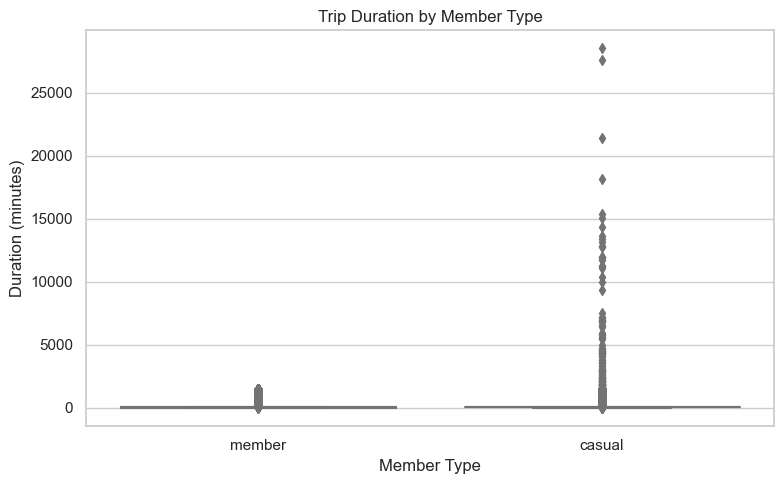

Saved box plot to C:\Users\henry\OneDrive\citibike-dashboard-2022\Visualizations\box_tripduration_by_member.png


In [6]:
trips["tripduration"] = (trips["ended_at"] - trips["started_at"]).dt.total_seconds() / 60
plt.figure(figsize=(8, 5))
sns.boxplot(data=trips, x="member_casual", y="tripduration")
plt.title("Trip Duration by Member Type")
plt.xlabel("Member Type")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
box_path = VIS_DIR / "box_tripduration_by_member.png"
plt.savefig(box_path)
plt.show()


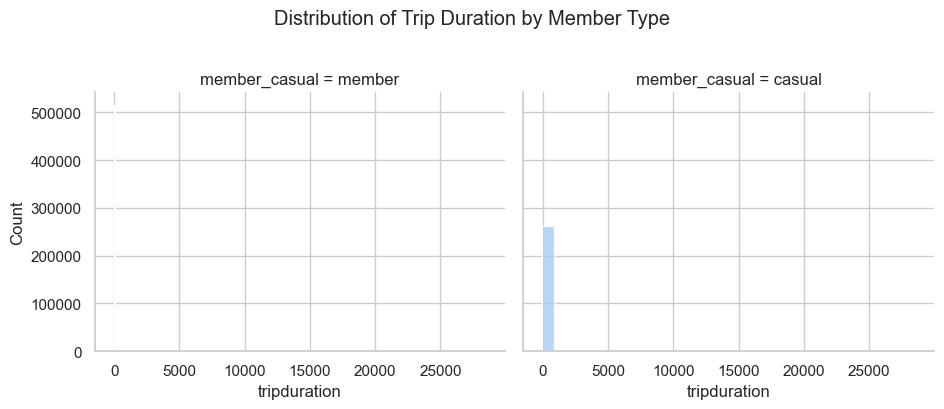

Saved FacetGrid to C:\Users\henry\OneDrive\citibike-dashboard-2022\Visualizations\facet_tripduration_by_member.png


In [7]:
g = sns.FacetGrid(trips, col="member_casual", height=4, aspect=1.2)
g.map(sns.histplot, "tripduration", bins=30)
plt.suptitle("Distribution of Trip Duration by Member Type", y=1.02)
plt.tight_layout()
facet_path = VIS_DIR / "facet_tripduration_by_member.png"
plt.savefig(facet_path)
plt.show()


**Analysis:**  
Regular members show shorter and tighter trip-duration distributions (lower median, smaller IQR), while casual users exhibit more variability and longer tails, suggesting different behavior (e.g., leisure trips vs. routine commutes).

**Insights:**  
1. Members concentrate on shorter durations, typical of commuting patterns.  
2. Casual riders exhibit a heavier tail in duration, indicating sporadic or leisure use.